In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
import scipy.stats as st
import seaborn as sns

In [2]:
class Tent:
    def eval(self, x):
        return 2*x*(x<0.5)*(x>=0) + (2-2*x)*(x>=0.5)*(x<=1)

In [7]:
class Ulam:
    def eval(self, x):
        return 2-x**2

### Tent Map

In [66]:
m = int(1e+2)
n = int(1e+2)
X = np.zeros((m,n))
init = np.random.rand(1,m)
X[:,0] = init

eps = 0.9
T = Tent()
for j in range(1,n):
    Xshift = np.roll(X[:,j-1],1)
    X[:,j] = T.eval(eps*Xshift + (1-eps)*X[:,j-1])

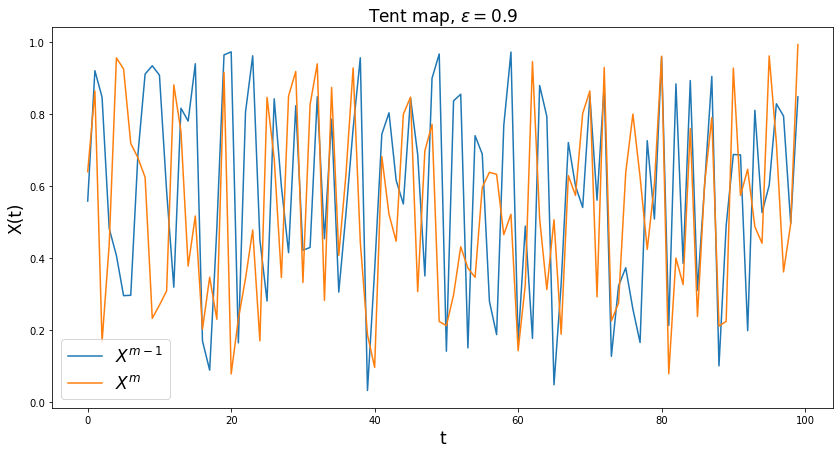

In [68]:
fig, ax = plt.subplots(1,1,figsize=(14,7))
_ = ax.plot(X[-2,:], label=r"$X^{m-1}$")
_ = ax.plot(X[-1,:], label=r"$X^{m}$")
_ = ax.set_xlabel("t", fontsize=17)
_ = ax.set_ylabel("X(t)", fontsize=17)
_ = ax.set_title(r"Tent map, $\epsilon = 0.9$", fontsize=17)
_ = ax.legend(fontsize=17)
fig.savefig("Tent_4")

### Ulam Map

In [10]:
m = int(1e+2)
n = int(1e+2)
X = np.zeros((m,n))
init = 4*(np.random.rand(1,m)-0.5) # starting points become (-2,2)
X[:,0] = init

eps = 0.9
U = Ulam()
for j in range(1,n):
    Xshift = np.roll(X[:,j-1],1)
    X[:,j] = U.eval(eps*Xshift + (1-eps)*X[:,j-1])

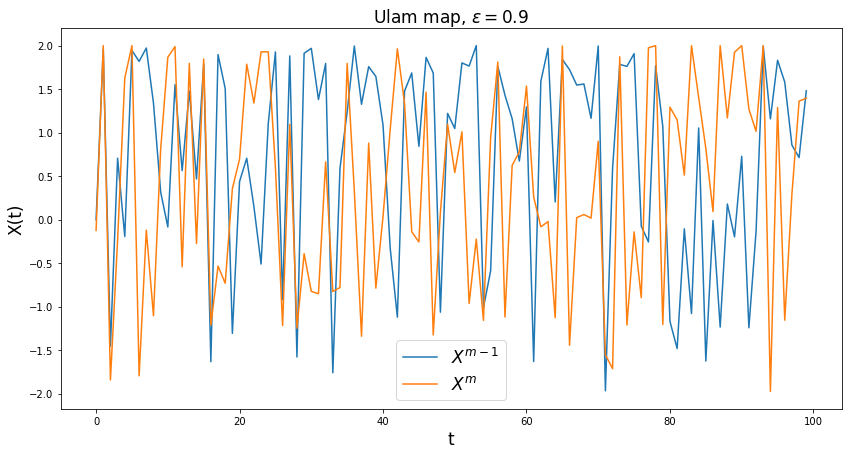

In [11]:
fig, ax = plt.subplots(1,1,figsize=(14,7))
_ = ax.plot(X[-1,:], label=r"$X^{m-1}$")
_ = ax.plot(X[0,:], label=r"$X^{m}$")
_ = ax.set_xlabel("t", fontsize=17)
_ = ax.set_ylabel("X(t)", fontsize=17)
_ = ax.set_title(r"Ulam map, $\epsilon = 0.9$", fontsize=17)
_ = ax.legend(fontsize=17)
fig.savefig("Ulam_4")

### Transfer Entropy

In [21]:
def TE(X,Y=0, r=0.5, xmin=0.0, xmax=1.0, direc=1):
    nBin = round((xmax-xmin)/r)
    
    # default direc=1 is from Y -> X
    # default direc is from i -> i+1
    if X.ndim==1:
        if direc==-1:
            X, Y = Y, X
        In1 = X[1:]
        In = X[:-1]
        Jn = Y[:-1]
    else:
        n = X.shape[1]
        m = X.shape[0]
        In1,In,Jn = np.zeros((3,(n-1)*(m-1)))
        for i in range(m-1):
            if direc == 1:
                In1[i*(n-1):(i+1)*(n-1)]= X[i+1,1:]
                In[i*(n-1):(i+1)*(n-1)]= X[i+1,:-1]
                Jn[i*(n-1):(i+1)*(n-1)]= X[i,:-1]
            else:
                In1[i*(n-1):(i+1)*(n-1)]= X[i,1:]
                In[i*(n-1):(i+1)*(n-1)]= X[i,:-1]
                Jn[i*(n-1):(i+1)*(n-1)]= X[i+1,:-1]
                
    tup = np.array([In1, In, Jn]).T
    H,edges=np.histogramdd(tup, bins=[nBin, nBin, nBin],range=[(xmin,xmax),(xmin,xmax),(xmin,xmax)])
    H=H/len(tup)
    
    H2 = np.sum(H, axis=0)
    
    H3 = np.sum(H, axis=2)
    
    H4 = np.sum(H3, axis=0)
    
    Hall = np.transpose(np.transpose((H/H2),(2,0,1))/(H3/H4),(1,2,0))
    
    for i in range(nBin):
        for j in range(nBin):
            for k in range(nBin):
                if np.isnan(Hall[i,j,k]) or Hall[i,j,k]==0:
                    Hall[i,j,k]=1
                    
    te = np.sum(H*np.log2(Hall))
    
    return te

### Main

In [33]:
m = int(1e+2)
n = int(1e+5)
U = Ulam()
eps=0.5
X = np.zeros((m,n))
X[:,0] = 4*(np.random.rand(1,m)-0.5) # starting points become (-2,2)
for j in range(1,n):
    Xshift = np.roll(X[:,j-1],1)
    X[:,j] = U.eval(eps*Xshift + (1-eps)*X[:,j-1])

In [34]:
TE(X,r=0.2, xmin=-2, xmax=2)

/Users/richardsuhendra/opt/miniconda3/envs/gallio/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


2.4427289778182337

In [38]:
m = int(1e+2)
n = int(1e+4)
k=10
TElist = []
TElist2 = []
EPS = np.linspace(1e-3, 1, k)
U = Ulam()
for i in range(k):
    eps=EPS[i]
    X = np.zeros((m,n))
    X[:,0] = 4*(np.random.rand(1,m)-0.5) # starting points become (-2,2)
    for j in range(1,n):
        Xshift = np.roll(X[:,j-1],1)
        X[:,j] = U.eval(eps*Xshift + (1-eps)*X[:,j-1])
    X = X + st.uniform.rvs(loc=-1, scale=2, size=X.shape, random_state=None)
    #TElist.append(TE(X,r=0.2, xmin=-2, xmax=2, direc=-1))
    TElist.append(TE(X,r=0.2, xmin=-3, xmax=3., direc=1))

/Users/richardsuhendra/opt/miniconda3/envs/gallio/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


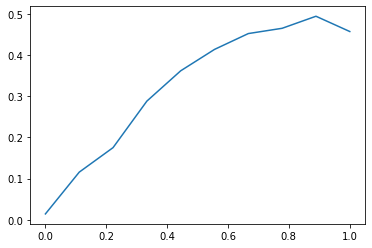

In [39]:
plt.plot(EPS, TElist)

In [22]:
#np.savetxt('myfile.csv', np.array(TElist), delimiter=',')

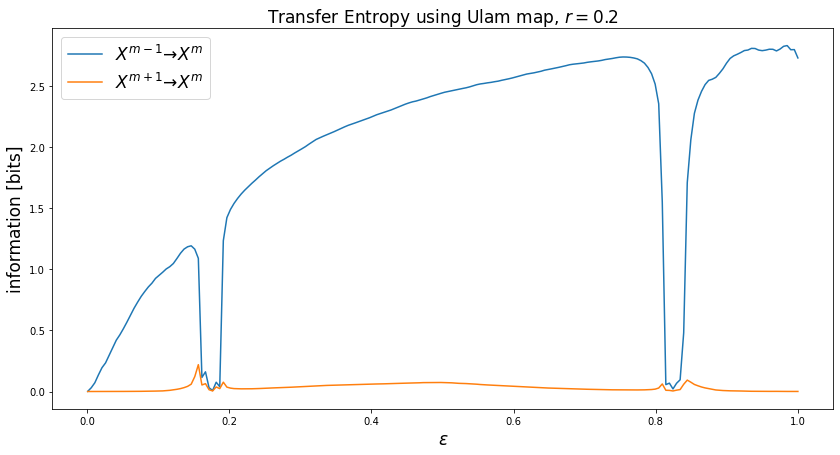

In [21]:
fig, ax = plt.subplots(1,1,figsize=(14,7))
_ = ax.plot(EPS,TElist[1::2], label=r"$X^{m-1} \to X^m$")
_ = ax.plot(EPS,TElist[0::2], label=r"$X^{m+1} \to X^{m}$")
_ = ax.set_xlabel(r"$\varepsilon$", fontsize=17)
_ = ax.set_ylabel(r"information [bits]", fontsize=17)
_ = ax.set_title(r"Transfer Entropy using Ulam map, $r=0.2$", fontsize=17)
_ = ax.legend(fontsize=17)


In [24]:
fig.savefig("Ulam_1")

In [50]:
m = int(1e+2)
n = int(1e+5)
k=10
TElist2 = []
EPS = np.linspace(1e-3, 0.1, k)
T = Tent()
for i in range(k):
    eps=EPS[i]
    X = np.zeros((m,n))
    X[:,0] = np.random.rand(1,m)
    for j in range(1,n):
        Xshift = np.roll(X[:,j-1],1)
        X[:,j] = T.eval(eps*Xshift + (1-eps)*X[:,j-1])
    X = X + st.uniform.rvs(loc=-0.5, scale=1, size=X.shape, random_state=None)
    # TElist.append(TE(X[:,6],X[:,5],r=0.2, xmin=-2, xmax=2, direc=1))
    TElist2.append(TE(X,r=1, xmin=-0.5, xmax=1.5, direc=-1))
    TElist2.append(TE(X,r=1, xmin=-0.5, xmax=1.5, direc=1))

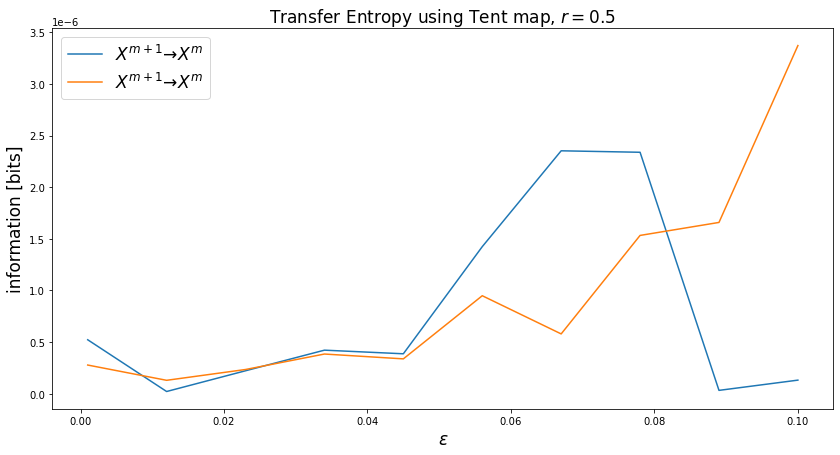

In [52]:
fig, ax = plt.subplots(1,1,figsize=(14,7))
#_ = ax.plot(EPS,TElist[1::2], label=r"$X^{m-1} \to X^m$")
_ = ax.plot(EPS,TElist[0::2], label=r"$X^{m+1} \to X^{m}$")
#_ = ax.plot(EPS,TElist2[1::2], label=r"$X^{m-1} \to X^m$")
_ = ax.plot(EPS,TElist2[0::2], label=r"$X^{m+1} \to X^{m}$")
#_ = ax.plot(EPS,0.8*EPS**2, label=r"$0.8\varepsilon^2$")
_ = ax.set_xlabel(r"$\varepsilon$", fontsize=17)
_ = ax.set_ylabel(r"information [bits]", fontsize=17)
_ = ax.set_title(r"Transfer Entropy using Tent map, $r=0.5$", fontsize=17)
_ = ax.legend(fontsize=17)